In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

print(wego.shape)
wego.head()

(350329, 30)


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [ ]:
wego.info()

In [ ]:
wego.isna().sum()

In [ ]:
# wego_clean = wego.dropna(subset = ['ADHERENCE', 'ACTUAL_DEPARTURE_TIME', 'SCHEDULED_TIME'])
# wego_clean.shape

In [ ]:
# wego_clean['SCHEDULED_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])
# wego_clean['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego_clean['ACTUAL_DEPARTURE_TIME'])
# wego_clean.info()

In [ ]:
# wego_clean['ADHERENCE'] = wego_clean['ADHERENCE'].astype(int)
# wego_clean['ADHERENCE']

In [ ]:
# wego_clean.reset_index(drop=True, inplace=True)
# wego_clean.head()

In [ ]:
# wego_clean.info()

#### 1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [5]:
# sum adjusted counts for ontime, early, and late
ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()
early = wego['ADJUSTED_EARLY_COUNT'].sum()
late = wego['ADJUSTED_LATE_COUNT'].sum()

# total trips
total = ontime + early + late

# ontime performance percentage
ontime_performance = round((ontime / total) * 100, 2)

# early performance percentage
early_performance = round((early / total) * 100, 2)

# late performance percentage
late_performance = round((late / total) * 100, 2)

print(f"Overall On-Time Performance: {ontime_performance:.2f}%")
print(f"Overall Early Performance: {early_performance:.2f}%")
print(f"Overall Late Performance: {late_performance:.2f}%")

Overall On-Time Performance: 79.69%
Overall Early Performance: 2.88%
Overall Late Performance: 17.42%


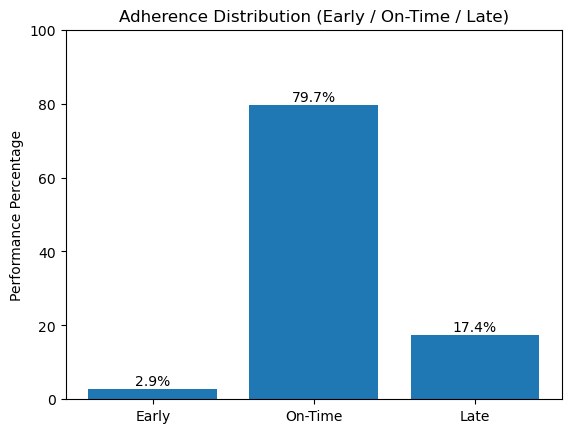

In [71]:
pct = {
    "Early": early_performance,
    "On-Time": ontime_performance,
    "Late": late_performance
}

labels, values = zip(*pct.items())

plt.figure()
plt.bar(labels, values)
plt.ylabel("Performance Percentage")
plt.title("Adherence Distribution (Early / On-Time / Late)")
plt.ylim(0, 100)
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.savefig('adherence_distribution.png')

plt.show()

In [84]:
adherence_route_mean = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean().reset_index()
adherence_route_mean = pd.DataFrame(adherence_route_mean)
adherence_route_mean

,ROUTE_ABBR,ADHERENCE
0,3,-3.761491
1,7,-3.346555
2,22,-1.138107
3,23,-1.760110
4,50,-2.505022
5,52,-3.971342
6,55,-4.823302
7,56,-2.703988


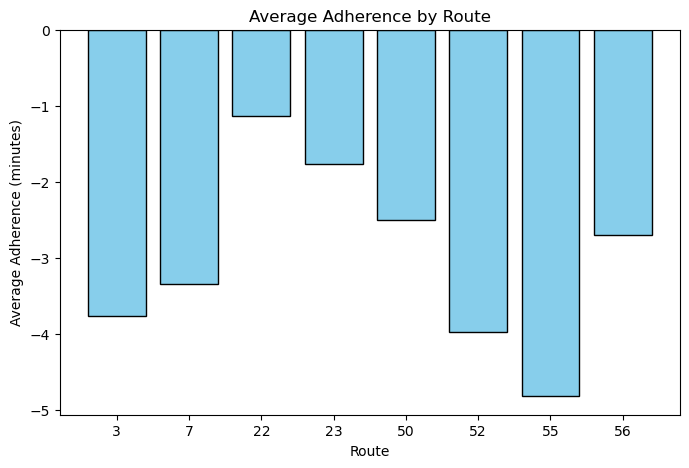

In [94]:
plt.figure(figsize=(8,5))
plt.bar(adherence_route_mean['ROUTE_ABBR'].astype(str), adherence_route_mean['ADHERENCE'] , color='skyblue', edgecolor='black')
plt.title('Average Adherence by Route')
plt.xlabel('Route')
plt.ylabel('Average Adherence (minutes)')
plt.show()

In [61]:
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

#### 2. How does direction of travel, route, or location affect the on-time performance?

In [95]:
# Group by route and sum adjusted counts
route_group = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}) 

# Calculate total trips per route
route_group['Total Trips'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] + 
    route_group['ADJUSTED_LATE_COUNT'] + 
    route_group['ADJUSTED_EARLY_COUNT']
)

# Calculate on-time percentage
route_group['On-Time Pct'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] / route_group['Total Trips']
) * 100

# Show top and bottom routes by on-time performance
route_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,Total Trips,On-Time Pct
0,22,22492,2065,631,25188,89.296490
1,23,35137,3230,1286,39653,88.611202
2,50,36309,5113,1207,42629,85.174412
3,56,48361,8837,1752,58950,82.037320
4,7,13417,3417,433,17267,77.703133
5,52,37736,10038,1553,49327,76.501713
6,3,34516,9590,1382,45488,75.879353
7,55,42080,16748,1531,60359,69.716198


In [96]:
# Group by direction and calculate adjusted on-time performance
direction_group = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# calculate total trips per direction (to downtown / from downtown)
direction_group['dir_total_trips'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] + 
    direction_group['ADJUSTED_LATE_COUNT'] + 
    direction_group['ADJUSTED_EARLY_COUNT']
)

# Calculate percentage
direction_group['On-Time Pct'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] / direction_group['dir_total_trips']
) * 100
   
direction_group.sort_values('On-Time Pct', ascending=False).reset_index()

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,dir_total_trips,On-Time Pct
0,TO DOWNTOWN,135634,19437,4484,159555,85.007678
1,FROM DOWNTOWN,134414,39601,5291,179306,74.963470


In [100]:
# by location
location_group = wego.groupby('TIME_POINT_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# Calculate total trips per location
location_group['loc_total_trips'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] + 
    location_group['ADJUSTED_LATE_COUNT'] + 
    location_group['ADJUSTED_EARLY_COUNT']
)

location_group['On-Time Pct'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] / location_group['loc_total_trips']
) * 100

# Show locations with best and worst on-time performance
location_group.sort_values('On-Time Pct', ascending=False).reset_index()

,TIME_POINT_ABBR,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,loc_total_trips,On-Time Pct
0,MCC5_6,115,1,0,116,99.137931
1,25ACLARK,2335,38,18,2391,97.657884
2,MCC5_10,7025,310,29,7364,95.396524
3,MCC4_24,7603,364,46,8013,94.883315
4,MEIG,97,5,4,106,91.509434
...,...,...,...,...,...,...
56,HEAD,37,3,32,72,51.388889
57,MCC5_12,16,23,0,39,41.025641
58,MCC5_11,21,49,0,70,30.000000
59,MCC4_13,19,3,48,70,27.142857


In [67]:
# top_direction = direction_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_direction, x='ROUTE_DIRECTION_NAME', y='On-Time Pct')
# plt.title('')
# plt.ylabel('On-Time Percentage')
# plt.xlabel('Direction')
# plt.ylim(0, 100)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

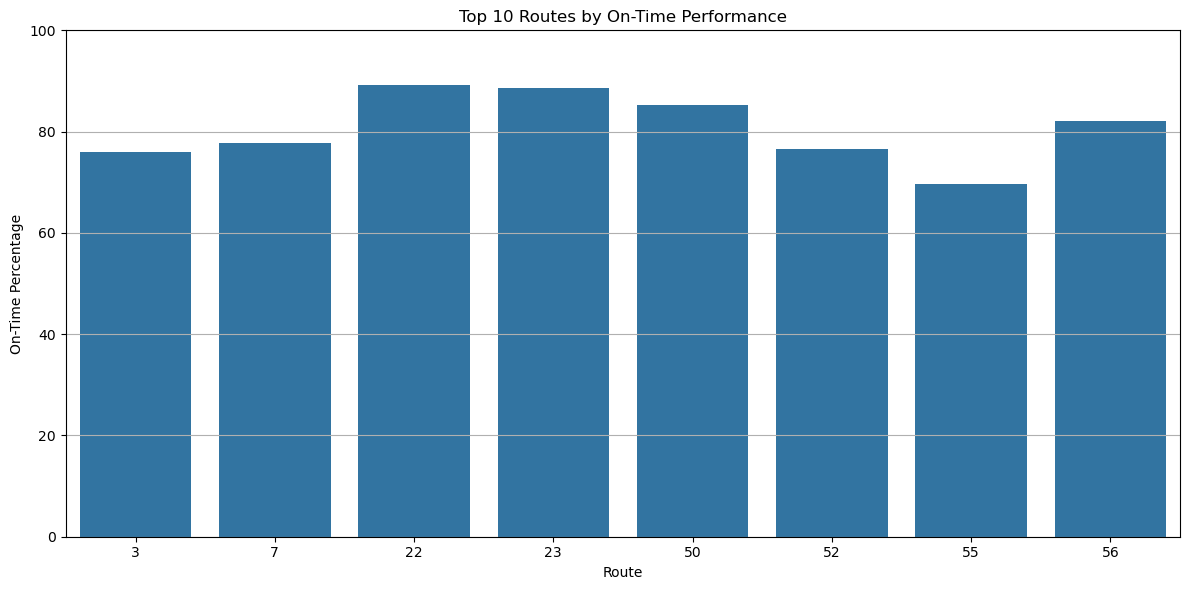

In [72]:
top_routes = route_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='ROUTE_ABBR', y='On-Time Pct')
plt.title('Top 10 Routes by On-Time Performance')
plt.ylabel('On-Time Percentage')
plt.xlabel('Route')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('top_10_routes_ontime_perf.png')

plt.show()

In [68]:
# top_location = location_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_location, x='TIME_POINT_ABBR', y='On-Time Pct')
# plt.title('Top 10 Locations by On-Time Performance')
# plt.ylabel('On-Time Percentage')
# plt.xlabel('Route')
# plt.ylim(0, 100)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

#### 3. How does time of day or day of week affect on-time performance?